In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("../data/digits_train_sample.csv")
test_data = pd.read_csv("../data/digits_test_sample.csv")

In [3]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape


(6000, 785)

In [5]:
train_data.describe(np.arange(.1,1,.1))

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,6000.0000,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,6000.0,6000.0,6000.0
mean,4.5155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.177000,0.079667,0.116000,0.078833,0.052667,0.010333,0.0,0.0,0.0,0.0
std,2.9111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.105913,2.492393,5.114317,4.024216,3.227842,0.800417,0.0,0.0,0.0,0.0
min,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
20%,1.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
30%,2.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
40%,3.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,5.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
60%,6.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [6]:
train_data.isnull().sum().sum()

0

In [7]:
train_data['label'].value_counts()

7    677
1    671
8    628
0    603
9    594
6    591
3    583
2    567
4    546
5    540
Name: label, dtype: int64

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

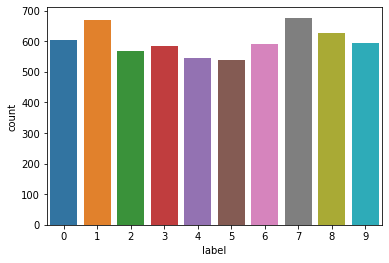

In [8]:
sns.countplot(train_data["label"])

In [9]:
train_data.iloc[0]

label    3
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 785, dtype: int64

In [10]:
three = train_data.iloc[0, 1:]

In [11]:
three.values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  74, 181, 255, 215,
        171,  59,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Text(0.5, 1.0, 'Digit 3')

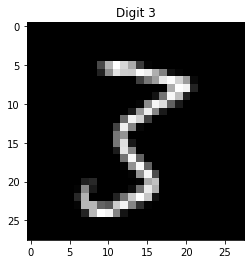

In [54]:
three = train_data.iloc[0, 1:]
three = three.values.reshape(28,28)
plt.imshow(three, cmap='gray')
plt.title("Digit 3")

In [12]:
digito=train_data.iloc[10, 1:]

In [13]:
digito.values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  20, 111, 189, 151,  63,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Text(0.5, 1.0, 'Digit ')

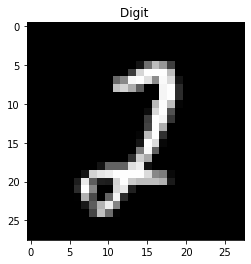

In [14]:
digit = train_data.iloc[10, 1:]
digit=digit.values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit ")

Text(0.5, 1.0, 'Digit ')

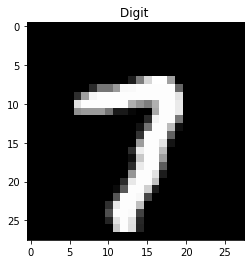

In [15]:
digit = train_data.iloc[100, 1:]
digit=digit.values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit ")

In [16]:
X = train_data[[x for x in train_data.columns if x != "label"]]
y = train_data[["label"]]

In [17]:
X = X/255.0
test_data = test_data/255.0

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

In [19]:
X_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
4910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y_train

,label
4910,7
5805,4
5224,9
3580,5
1417,2
...,...
3296,2
2027,4
3436,9
1697,6


In [21]:
 y_train.values.ravel()

array([7, 4, 9, ..., 9, 6, 1])

In [22]:
svm = SVC()
svm.fit(X_train, y_train.values.ravel())

SVC()

In [23]:
ls_scores = cross_val_score(estimator=svm, scoring="accuracy", X=X_train, y=y_train, cv=4, n_jobs=-1)
np.mean(ls_scores), np.std(ls_scores)

(0.9469047619047619, 0.004826936888741294)

In [24]:
param_grid = {"C": [x for x in range(10)],
              "kernel": ['linear', 'poly', 'rbf', 'sigmoid']}

In [25]:
n_hyper = np.prod([x for x in map(len, param_grid.values())])

In [26]:
n_hyper

40

In [29]:
model = SVC()
clf = GridSearchCV(model, param_grid, cv=4, error_score=-1000, n_jobs=-1, scoring="accuracy", verbose=5)
clf.fit(X_train, y_train.values.ravel())

Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  6.8min finished


GridSearchCV(cv=4, error_score=-1000, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=5)

In [30]:
print("Best score: " + str(clf.best_score_))
print("Best estimator: " + str(clf.best_estimator_))

Best score: 0.9530952380952381
Best estimator: SVC(C=3)


In [31]:
svm.predict(X_test)

array([6, 2, 6, ..., 5, 6, 5])

In [37]:
y_test

,label
2949,6
3835,2
2817,6
3594,4
3049,7
...,...
3823,8
4259,7
2095,5
5319,6


In [70]:
X_test.iloc[[0]]

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
5384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
svm.predict(X_test.iloc[[0]])

array([6])

Text(0.5, 1.0, 'Digit ')

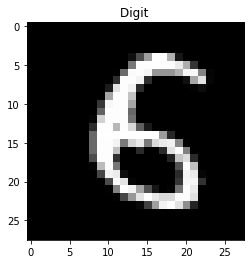

In [72]:

digit=X_test.iloc[[0]].values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit ")

In [73]:
svm.predict(X_test.iloc[[-1]])

array([1])

Text(0.5, 1.0, 'Digit ')

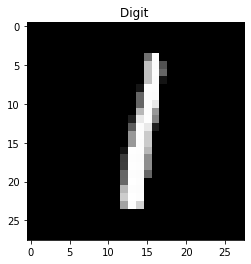

In [74]:

digit=X_test.iloc[[-1]].values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit ")

## Imagenes

In [27]:
image = plt.imread('por-que-nos-parece-que-los-perros-sonrien-una-historia-de-30-000-anos.jpg')

In [75]:
image = plt.imread('por-que-nos-parece-que-los-perros-sonrien-una-historia-de-30-000-anos.jpg')

In [28]:
image

array([[[196, 203, 213],
        [196, 203, 213],
        [196, 203, 213],
        ...,
        [ 82,  68,  29],
        [ 82,  68,  29],
        [ 82,  68,  29]],

       [[195, 202, 212],
        [195, 202, 212],
        [195, 202, 212],
        ...,
        [ 82,  68,  29],
        [ 82,  68,  29],
        [ 82,  68,  29]],

       [[195, 202, 212],
        [195, 202, 212],
        [195, 202, 212],
        ...,
        [ 81,  67,  28],
        [ 81,  67,  28],
        [ 81,  67,  28]],

       ...,

       [[152, 145,  90],
        [118, 111,  57],
        [134, 124,  75],
        ...,
        [155, 147,  82],
        [153, 145,  80],
        [150, 142,  77]],

       [[182, 175, 121],
        [128, 121,  69],
        [140, 129,  83],
        ...,
        [156, 148,  83],
        [153, 145,  80],
        [150, 142,  77]],

       [[212, 205, 153],
        [149, 141,  92],
        [152, 141,  95],
        ...,
        [156, 148,  83],
        [153, 145,  80],
        [151, 143,  78]]

In [29]:
image.shape

(900, 1600, 3)

In [30]:
import cv2

cv2.imread('por-que-nos-parece-que-los-perros-sonrien-una-historia-de-30-000-anos.jpg')

array([[[213, 203, 196],
        [213, 203, 196],
        [213, 203, 196],
        ...,
        [ 29,  68,  82],
        [ 29,  68,  82],
        [ 29,  68,  82]],

       [[212, 202, 195],
        [212, 202, 195],
        [212, 202, 195],
        ...,
        [ 29,  68,  82],
        [ 29,  68,  82],
        [ 29,  68,  82]],

       [[212, 202, 195],
        [212, 202, 195],
        [212, 202, 195],
        ...,
        [ 28,  67,  81],
        [ 28,  67,  81],
        [ 28,  67,  81]],

       ...,

       [[ 90, 145, 152],
        [ 57, 111, 118],
        [ 75, 124, 134],
        ...,
        [ 82, 147, 155],
        [ 80, 145, 153],
        [ 77, 142, 150]],

       [[121, 175, 182],
        [ 69, 121, 128],
        [ 83, 129, 140],
        ...,
        [ 83, 148, 156],
        [ 80, 145, 153],
        [ 77, 142, 150]],

       [[153, 205, 212],
        [ 92, 141, 149],
        [ 95, 141, 152],
        ...,
        [ 83, 148, 156],
        [ 80, 145, 153],
        [ 78, 143, 151]]

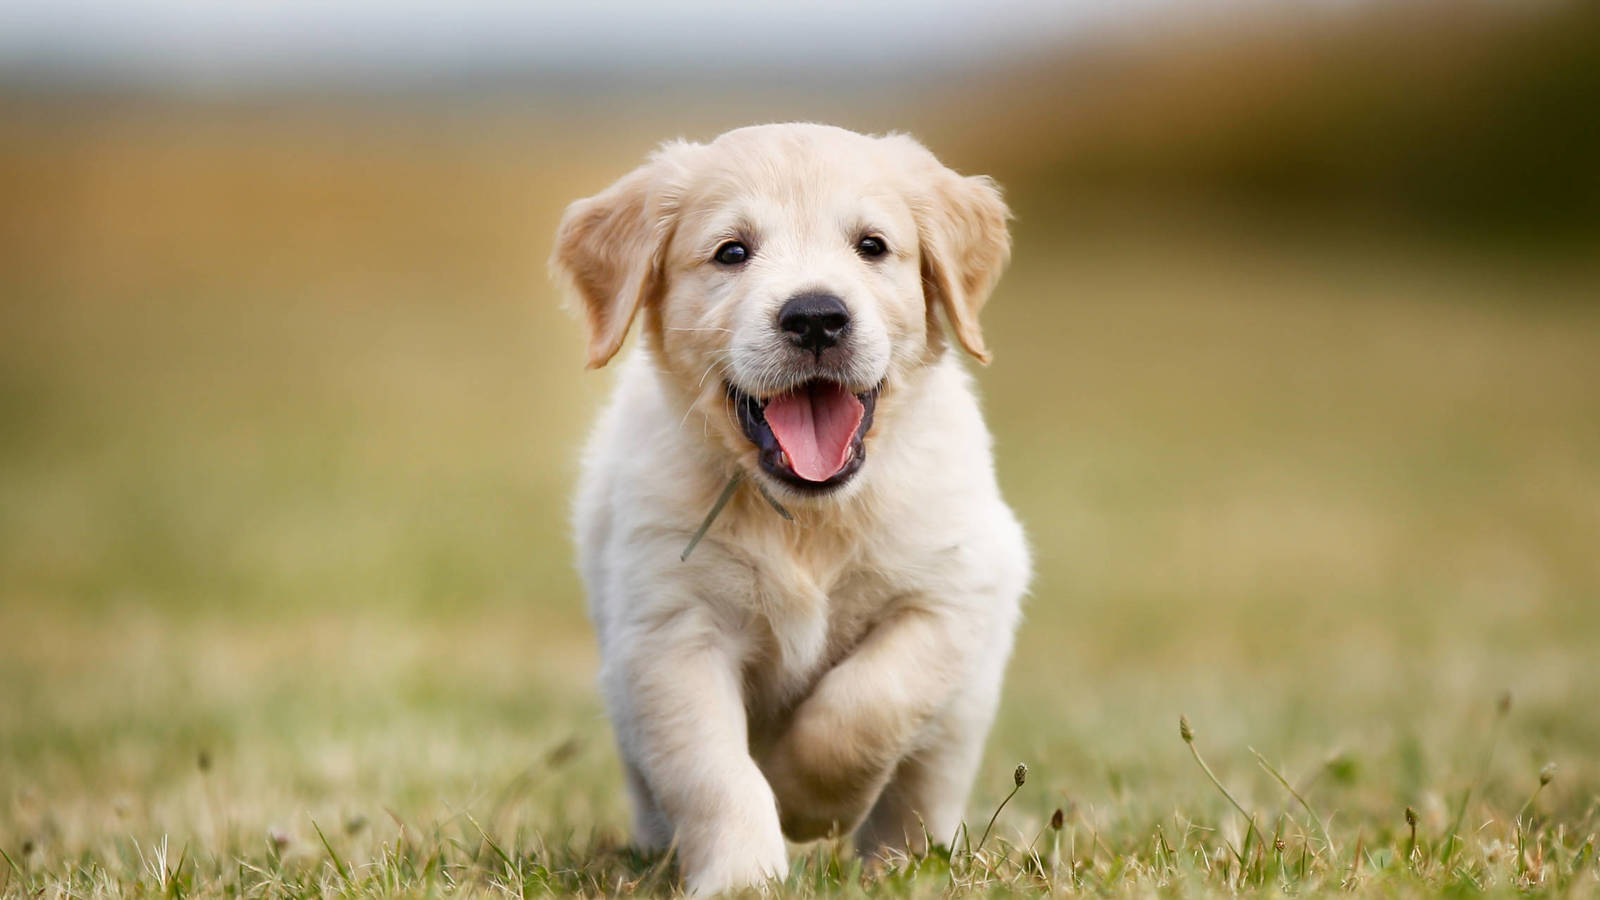

In [31]:
from PIL import Image

Image.open('por-que-nos-parece-que-los-perros-sonrien-una-historia-de-30-000-anos.jpg')
